In [1]:
import pandas as pd

# titles.csv

In [2]:
t = pd.read_csv('C:/Users/dell/Documents/ML Training/OneDrive-2024-06-20/titles.csv')
t.head()

,title,year
0,El plebeyo,1953
1,Atoski vrtovi - preobrazenje,1989
2,Mateegy norkos,2006
3,Lanka Dahanam,1936
4,Acciaio,1933


## Using groupby(), plot the number of films that have been released each decade in the history of cinema.

In [3]:
t1 = t
t1 = t1.groupby(t1.year // 10 * 10).size()
t1

year
1890        3
1900       39
1910     6752
1920     8954
1930    10245
1940     8561
1950    12664
1960    17419
1970    18476
1980    19532
1990    21547
2000    35730
2010    65830
2020      260
2110        1
dtype: int64

<AxesSubplot:title={'center':'Number of films released each decade'}, xlabel='Decade', ylabel='Number of films'>

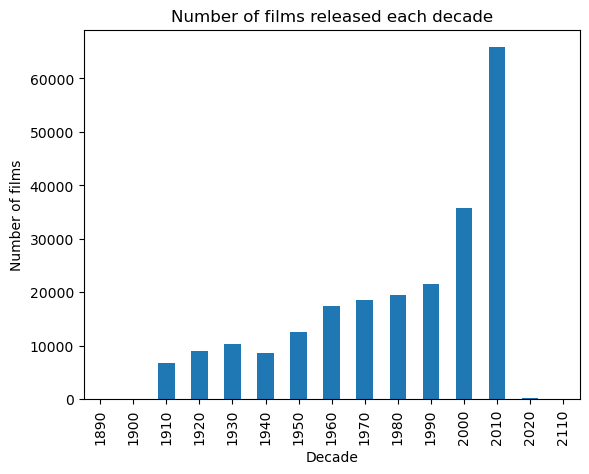

In [4]:
t1.plot(kind = 'bar' , title = 'Number of films released each decade' , xlim = (1890 , 2020) , ylabel = "Number of films" , xlabel = "Decade")

# cast.csv

In [5]:
c = pd.read_csv('C:/Users/dell/Documents/ML Training/OneDrive-2024-06-20/cast.csv')
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [6]:
#adding decade column
c['decade'] = c.year // 10 * 10
c.head()

,title,year,name,type,character,n,decade
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010


## Use groupby() to plot the number of "Hamlet" films made each decade.

In [7]:
c1 = c
c1 = c1[c1.title == "Hamlet"]
c1 = c1.groupby('decade').size()
c1

decade
1910    28
1920     9
1940    24
1950     5
1960    57
1970    19
1980     3
1990    83
2000    55
2010    59
dtype: int64

<AxesSubplot:title={'center':'Number of Hamlet films made each decade'}, xlabel='Decade', ylabel='Number of Hamlet films'>

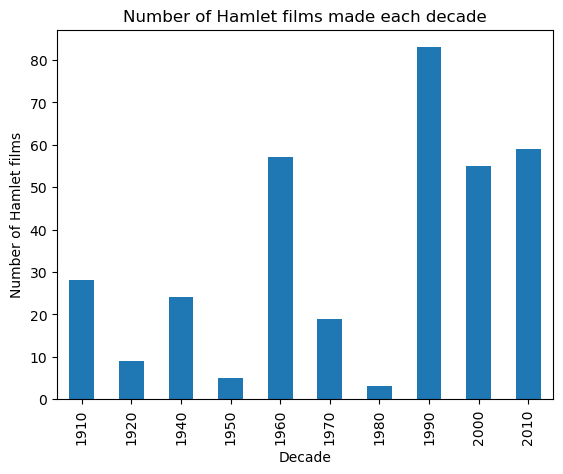

In [8]:
c1.plot(kind = 'bar' , title = 'Number of Hamlet films made each decade' , xlim = (1910 , 2010) , ylabel = "Number of Hamlet films" , xlabel = "Decade")

## How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [9]:
c2 = c
c2 = c2[c2.year // 10 == 195]
c2 = c2[c2.n == 1]
c2 = c2.groupby(['year' , 'type']).size()
c2

year  type   
1950  actor      622
      actress    287
1951  actor      640
      actress    283
1952  actor      605
      actress    300
1953  actor      648
      actress    305
1954  actor      616
      actress    311
1955  actor      634
      actress    281
1956  actor      651
      actress    304
1957  actor      700
      actress    303
1958  actor      674
      actress    292
1959  actor      692
      actress    319
dtype: int64

In [10]:
c2 = c2.to_frame()
c2

0
year type        
1950 actor    622
     actress  287
1951 actor    640
     actress  283
1952 actor    605
     actress  300
1953 actor    648
     actress  305
1954 actor    616
     actress  311
1955 actor    634
     actress  281
1956 actor    651
     actress  304
1957 actor    700
     actress  303
1958 actor    674
     actress  292
1959 actor    692
     actress  319

In [11]:
c2.rename(columns = {0 : 'Number of roles'})

Number of roles
year type                    
1950 actor                622
     actress              287
1951 actor                640
     actress              283
1952 actor                605
     actress              300
1953 actor                648
     actress              305
1954 actor                616
     actress              311
1955 actor                634
     actress              281
1956 actor                651
     actress              304
1957 actor                700
     actress              303
1958 actor                674
     actress              292
1959 actor                692
     actress              319

## In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?


In [12]:
c3 = c
c3 = c3[c3.decade == 1950]
c3 = c3[c3.n < 6]
c3 = c3.groupby(['n' , 'type']).size()
c3

n    type   
1.0  actor      6482
     actress    2985
2.0  actor      4520
     actress    4496
3.0  actor      5489
     actress    3109
4.0  actor      5479
     actress    2820
5.0  actor      5493
     actress    2531
dtype: int64

In [13]:
c3 = c3.to_frame()
c3.rename(columns = {0 : 'Number of roles'})

Number of roles
n   type                    
1.0 actor               6482
    actress             2985
2.0 actor               4520
    actress             4496
3.0 actor               5489
    actress             3109
4.0 actor               5479
    actress             2820
5.0 actor               5493
    actress             2531

## Use groupby() to determine how many roles are listed for each movie named The Pink Panther.

In [27]:
c4 = c
c4 = c4[(c4.title == "The Pink Panther") & (c4.n.isnull() == False)]
c4 = c4.groupby(['year']).size()
c4

year
1963    15
2006    51
dtype: int64

In [22]:
len(c4[(c4.year == 2006) & (c4.n.isnull() == False)])

51

In [23]:
len(c4[(c4.year == 1963) & (c4.n.isnull() == False)])


15

## List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [30]:
c5 = c
c5 = c5[c5.name == "Frank Oz"]
n = c5.groupby(['year' , 'title']).size()
n = n[n>1]
n

year  title                               
1979  The Muppet Movie                        8
1981  The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

## List each of the characters that Frank Oz has portrayed at least twice.

In [33]:
c6 = c
c6 = c6[c6.name == "Frank Oz"]
n = c6.groupby('character').size()
n = n[n>=2]
n

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        5
Sam the Eagle     5
Yoda              6
dtype: int64